# Our Goal

Create our model which can best cover a modular % of a city's area with bike stations using the Helsinki data as a reference for a standard for bike speed and distance traveled in a trip. This standard specifically is the distribution of trip time and distance that the Helsinki dataset shows for bike rides(x% of the city must be covered by times no greater than one standard deviation away from the mean of a bike ride's distance). This should trained using the bus stations from the philly dataset. The bus stations are locations where bike stations must be placed as they are the center of our network which would ideally limit the last mile problem.

If we are able to, we may also want to examine the density of travel by the traits of an area (amount of stations, amount of datapoints at certain lat-long coordinates, etc) to determine how many bike stations are required in a given area, we could also look for public population density data but we would need it for both Helsinki and Philadelphia

# PART I

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Helsinki Bikes Dataset

Data from the helsinki bikes dataset(this will be used as our reference for trip length, travel speed, usage time, etc)

https://www.kaggle.com/datasets/geometrein/helsinki-city-bikes?resource=download&select=database.csv located here

In [106]:
url ="\data\helsinki.csv"

In [107]:
helsinki = pd.read_csv(url, low_memory=False)

In [108]:
helsinki.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude,Air temperature (degC)
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781,0.9
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168609,24.930537,60.165017,24.949473,0.9
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412,0.9
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930,0.9
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872,0.9


In [109]:
helsinki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12157458 entries, 0 to 12157457
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   departure               object 
 1   return                  object 
 2   departure_id            object 
 3   departure_name          object 
 4   return_id               object 
 5   return_name             object 
 6   distance (m)            float64
 7   duration (sec.)         float64
 8   avg_speed (km/h)        float64
 9   departure_latitude      float64
 10  departure_longitude     float64
 11  return_latitude         float64
 12  return_longitude        float64
 13  Air temperature (degC)  float64
dtypes: float64(8), object(6)
memory usage: 1.3+ GB


Quick visualization to ensure the data matches the source

<AxesSubplot:xlabel='departure_longitude', ylabel='departure_latitude'>

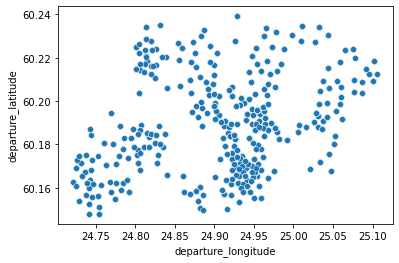

In [110]:
sns.scatterplot(data = helsinki.head(10000), x = "departure_longitude", y = "departure_latitude",)

In [111]:
helsinki.isnull().sum()

departure                     0
return                        0
departure_id                  0
departure_name                0
return_id                     0
return_name                   0
distance (m)                  0
duration (sec.)               0
avg_speed (km/h)           3550
departure_latitude            0
departure_longitude           0
return_latitude               1
return_longitude              1
Air temperature (degC)    15902
dtype: int64

We will not be working with temperature for this analysis project so we will drop that column, avg speed we will drop th entries missing as those 3 thousand entries are very little compared to the 1million+ contained in the dataset.

In [112]:
helsinki.drop("Air temperature (degC)", axis = 1, inplace = True)

In [113]:
helsinki.dropna(inplace = True)

In [114]:
helsinki.head()

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168609,24.930537,60.165017,24.949473
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872


In [115]:
helsinki.isnull().sum()

departure              0
return                 0
departure_id           0
departure_name         0
return_id              0
return_name            0
distance (m)           0
duration (sec.)        0
avg_speed (km/h)       0
departure_latitude     0
departure_longitude    0
return_latitude        0
return_longitude       0
dtype: int64

<AxesSubplot:xlabel='distance (m)'>

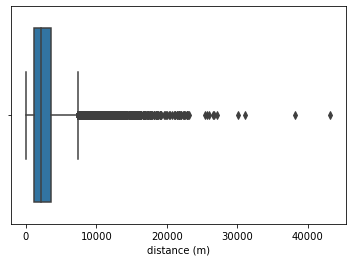

In [116]:
sns.boxplot(x = helsinki.head(100000)['distance (m)']) #Outliers will need to be removed

<AxesSubplot:xlabel='distance (m)', ylabel='duration (sec.)'>

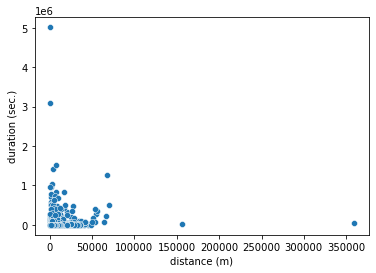

In [117]:
sns.scatterplot(data = helsinki.head(1000000), x = 'distance (m)', y = "duration (sec.)") #Outliers here also damage the graph signifigantly

In [118]:
new_helsinki = helsinki[['distance (m)','duration (sec.)']]
new_helsinki.head()

,distance (m),duration (sec.)
0,1747.0,401.0
1,1447.0,869.0
2,1772.0,469.0
3,7456.0,2406.0
4,7120.0,1679.0


In [119]:
new_helsinki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12153907 entries, 0 to 12157457
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   distance (m)     float64
 1   duration (sec.)  float64
dtypes: float64(2)
memory usage: 278.2 MB


In [120]:
new_helsinki = new_helsinki[new_helsinki['distance (m)'].between(0, new_helsinki['distance (m)'].quantile(0.99))]

In [121]:
new_helsinki = new_helsinki[helsinki['duration (sec.)'].between(0, new_helsinki['duration (sec.)'].quantile(0.99))]

<ipython-input-121-7f3caa123e45>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_helsinki = new_helsinki[helsinki['duration (sec.)'].between(0, new_helsinki['duration (sec.)'].quantile(0.99))]


In [122]:
new_helsinki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11912126 entries, 0 to 12157457
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   distance (m)     float64
 1   duration (sec.)  float64
dtypes: float64(2)
memory usage: 272.6 MB


<AxesSubplot:xlabel='distance (m)'>

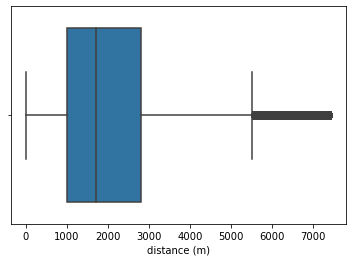

In [123]:
sns.boxplot(x = new_helsinki['distance (m)'])

# Loading the Philly Busses Dataset

In [124]:
# http://www3.septa.org/hackathon/TransitViewAll/

In [125]:
philly = pd.read_json("http://www3.septa.org/hackathon/TransitViewAll/")

In [126]:
philly_dict = philly.to_dict()

In [127]:
philly_dict['routes'].keys()

dict_keys([0])

The Dataset updates in real time so the bus numbers below will need to be changed with each run depending on what busses have data

In [128]:
philly_dict['routes'][0].keys()

dict_keys(['14', 'BLVDDIR', '70', '28', '58', '67', '20', '50', '84', '59', '66', '75', '25', '88', '3', '5', '73', 'J', 'K', 'R', '18', '26', '23', '32', '22', 'XH', '16', 'H', '47', 'L', '53', '89', '2', '55', '56', '61', '4', '57', '39', '101', '102', '125', '104', '120', '105', '111', '113', '115', '108', '109', '110', '119', '114', '112', '117', '107', '123', '9', '27', '6', '33', '49', '60', '48', '54', '97', '94', '96', '98', '90', '93', '99', '124', '129', '130', '132', '139', '150', '135', '45', '7', '12', '17', '37', '64', '29', '79', 'G', '68', '13', '36', '310', '15', '10', '21', '42', '30', '31', '38', '52', '40', '43', '46', '65', '44'])

In [129]:
philly_dict['routes'][0]["30"]

[{'lat': '39.964970000000001',
  'lng': '-75.226151000000002',
  'label': '3391',
  'VehicleID': '3391',
  'BlockID': '9177',
  'Direction': 'EastBound',
  'destination': '40th-Market',
  'Offset': '1',
  'heading': 90,
  'late': 0,
  'original_late': 0,
  'Offset_sec': '8',
  'trip': '839004',
  'next_stop_id': '21406',
  'next_stop_name': 'Vine St & 56th St',
  'next_stop_sequence': 20,
  'estimated_seat_availability': 'MANY_SEATS_AVAILABLE',
  'timestamp': 1652148065}]

In [130]:
philly = pd.DataFrame.from_dict(philly_dict['routes'][0]["30"])

In [131]:
philly 

,lat,lng,label,VehicleID,BlockID,Direction,destination,Offset,heading,late,original_late,Offset_sec,trip,next_stop_id,next_stop_name,next_stop_sequence,estimated_seat_availability,timestamp
0,39.964970000000001,-75.226151000000002,3391,3391,9177,EastBound,40th-Market,1,90,0,0,8,839004,21406,Vine St & 56th St,20,MANY_SEATS_AVAILABLE,1652148065


later we will remove the above entries, for now they establish the dataframe with the columns we want

In [132]:
for items in philly_dict['routes'][0]:
    philly = pd.concat([philly,pd.DataFrame(philly_dict['routes'][0][items])])

In [133]:
philly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 1
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   lat                          294 non-null    object
 1   lng                          294 non-null    object
 2   label                        294 non-null    object
 3   VehicleID                    294 non-null    object
 4   BlockID                      294 non-null    object
 5   Direction                    294 non-null    object
 6   destination                  294 non-null    object
 7   Offset                       294 non-null    object
 8   heading                      294 non-null    int64 
 9   late                         294 non-null    int64 
 10  original_late                294 non-null    int64 
 11  Offset_sec                   294 non-null    object
 12  trip                         294 non-null    object
 13  next_stop_id                 220 non-

In [134]:
philly.head(10)

,lat,lng,label,VehicleID,BlockID,Direction,destination,Offset,heading,late,original_late,Offset_sec,trip,next_stop_id,next_stop_name,next_stop_sequence,estimated_seat_availability,timestamp
0,39.964970000000001,-75.226151000000002,3391,3391,9177,EastBound,40th-Market,1,90,0,0,8,839004,21406,Vine St & 56th St,20,MANY_SEATS_AVAILABLE,1652148065
0,40.076453999999998,-75.032730000000001,7448,7448,1071,NorthBound,Byberry Industrial Park,1,30,2,1,34,830454,22513,Roosevelt Blvd & Welsh Rd,27,NOT_AVAILABLE,1652148064
1,40.093944999999998,-75.016304000000005,7451,7451,1073,SouthBound,Frankford Transportation Center,1,210,-6,-6,24,830605,18,Roosevelt Blvd & Byberry Rd - FS,61,NOT_AVAILABLE,1652148064
2,40.040787000000002,-75.058753999999993,7439,7439,1079,SouthBound,Frankford Transportation Center,1,195,-2,-2,10,830552,22,Roosevelt Blvd & Cottman Av,102,NOT_AVAILABLE,1652148064
3,40.062237000000003,-75.042648,8193,8193,1080,NorthBound,Neshaminy Mall,1,30,1,0,7,830474,22498,Roosevelt Blvd & Rhawn St - FS,20,NOT_AVAILABLE,1652148064
4,40.022967999999999,-75.078666999999996,8675,8675,1081,SouthBound,Frankford Transportation Center,1,180,4,4,5,830604,None,None,NaN,NOT_AVAILABLE,1652148064
5,40.180843000000003,-74.8797,8646,8646,1082,NorthBound,Oxford Valley Mall via Neshaminy Mall,1,315,1,1,15,830483,None,None,NaN,NOT_AVAILABLE,1652148064
0,39.952599999999997,-75.165199999999999,0,0,1114,NorthBound,Neshaminy Mall,21,0,998,998,1247,863842,None,None,NaN,NOT_AVAILABLE,1652148064
1,40.023491,-75.077636999999996,8688,8688,1115,NorthBound,Neshaminy Mall,1,30,0,0,20,863843,21962,Frankford Transportation Center-14-BLVDDIR-MFO,1,NOT_AVAILABLE,1652148064
2,40.035590999999997,-75.070273999999998,8645,8645,1116,SouthBound,Frankford Transportation Center,1,195,-1,-1,10,863876,21204,Frankford Transportation Center - Main Dropoff,10,NOT_AVAILABLE,1652148064


In [135]:
philly['Index'] = range(len(philly))
philly.head()

,lat,lng,label,VehicleID,BlockID,Direction,destination,Offset,heading,late,original_late,Offset_sec,trip,next_stop_id,next_stop_name,next_stop_sequence,estimated_seat_availability,timestamp,Index
0,39.964970000000001,-75.226151000000002,3391,3391,9177,EastBound,40th-Market,1,90,0,0,8,839004,21406,Vine St & 56th St,20,MANY_SEATS_AVAILABLE,1652148065,0
0,40.076453999999998,-75.032730000000001,7448,7448,1071,NorthBound,Byberry Industrial Park,1,30,2,1,34,830454,22513,Roosevelt Blvd & Welsh Rd,27,NOT_AVAILABLE,1652148064,1
1,40.093944999999998,-75.016304000000005,7451,7451,1073,SouthBound,Frankford Transportation Center,1,210,-6,-6,24,830605,18,Roosevelt Blvd & Byberry Rd - FS,61,NOT_AVAILABLE,1652148064,2
2,40.040787000000002,-75.058753999999993,7439,7439,1079,SouthBound,Frankford Transportation Center,1,195,-2,-2,10,830552,22,Roosevelt Blvd & Cottman Av,102,NOT_AVAILABLE,1652148064,3
3,40.062237000000003,-75.042648,8193,8193,1080,NorthBound,Neshaminy Mall,1,30,1,0,7,830474,22498,Roosevelt Blvd & Rhawn St - FS,20,NOT_AVAILABLE,1652148064,4


In [136]:
philly.set_index('Index', inplace = True)


In [137]:
philly.head(10)

,lat,lng,label,VehicleID,BlockID,Direction,destination,Offset,heading,late,original_late,Offset_sec,trip,next_stop_id,next_stop_name,next_stop_sequence,estimated_seat_availability,timestamp
Index,,,,,,,,,,,,,,,,,,
0,39.964970000000001,-75.226151000000002,3391,3391,9177,EastBound,40th-Market,1,90,0,0,8,839004,21406,Vine St & 56th St,20,MANY_SEATS_AVAILABLE,1652148065
1,40.076453999999998,-75.032730000000001,7448,7448,1071,NorthBound,Byberry Industrial Park,1,30,2,1,34,830454,22513,Roosevelt Blvd & Welsh Rd,27,NOT_AVAILABLE,1652148064
2,40.093944999999998,-75.016304000000005,7451,7451,1073,SouthBound,Frankford Transportation Center,1,210,-6,-6,24,830605,18,Roosevelt Blvd & Byberry Rd - FS,61,NOT_AVAILABLE,1652148064
3,40.040787000000002,-75.058753999999993,7439,7439,1079,SouthBound,Frankford Transportation Center,1,195,-2,-2,10,830552,22,Roosevelt Blvd & Cottman Av,102,NOT_AVAILABLE,1652148064
4,40.062237000000003,-75.042648,8193,8193,1080,NorthBound,Neshaminy Mall,1,30,1,0,7,830474,22498,Roosevelt Blvd & Rhawn St - FS,20,NOT_AVAILABLE,1652148064
5,40.022967999999999,-75.078666999999996,8675,8675,1081,SouthBound,Frankford Transportation Center,1,180,4,4,5,830604,None,None,NaN,NOT_AVAILABLE,1652148064
6,40.180843000000003,-74.8797,8646,8646,1082,NorthBound,Oxford Valley Mall via Neshaminy Mall,1,315,1,1,15,830483,None,None,NaN,NOT_AVAILABLE,1652148064
7,39.952599999999997,-75.165199999999999,0,0,1114,NorthBound,Neshaminy Mall,21,0,998,998,1247,863842,None,None,NaN,NOT_AVAILABLE,1652148064
8,40.023491,-75.077636999999996,8688,8688,1115,NorthBound,Neshaminy Mall,1,30,0,0,20,863843,21962,Frankford Transportation Center-14-BLVDDIR-MFO,1,NOT_AVAILABLE,1652148064


## Data Cleaning

In [138]:
#dropping the extra rows

philly.drop(index = range(len(philly_dict['routes'][0]["30"])), inplace = True)
philly.head(10)

,lat,lng,label,VehicleID,BlockID,Direction,destination,Offset,heading,late,original_late,Offset_sec,trip,next_stop_id,next_stop_name,next_stop_sequence,estimated_seat_availability,timestamp
Index,,,,,,,,,,,,,,,,,,
1,40.076453999999998,-75.032730000000001,7448,7448,1071,NorthBound,Byberry Industrial Park,1,30,2,1,34,830454,22513,Roosevelt Blvd & Welsh Rd,27,NOT_AVAILABLE,1652148064
2,40.093944999999998,-75.016304000000005,7451,7451,1073,SouthBound,Frankford Transportation Center,1,210,-6,-6,24,830605,18,Roosevelt Blvd & Byberry Rd - FS,61,NOT_AVAILABLE,1652148064
3,40.040787000000002,-75.058753999999993,7439,7439,1079,SouthBound,Frankford Transportation Center,1,195,-2,-2,10,830552,22,Roosevelt Blvd & Cottman Av,102,NOT_AVAILABLE,1652148064
4,40.062237000000003,-75.042648,8193,8193,1080,NorthBound,Neshaminy Mall,1,30,1,0,7,830474,22498,Roosevelt Blvd & Rhawn St - FS,20,NOT_AVAILABLE,1652148064
5,40.022967999999999,-75.078666999999996,8675,8675,1081,SouthBound,Frankford Transportation Center,1,180,4,4,5,830604,None,None,NaN,NOT_AVAILABLE,1652148064
6,40.180843000000003,-74.8797,8646,8646,1082,NorthBound,Oxford Valley Mall via Neshaminy Mall,1,315,1,1,15,830483,None,None,NaN,NOT_AVAILABLE,1652148064
7,39.952599999999997,-75.165199999999999,0,0,1114,NorthBound,Neshaminy Mall,21,0,998,998,1247,863842,None,None,NaN,NOT_AVAILABLE,1652148064
8,40.023491,-75.077636999999996,8688,8688,1115,NorthBound,Neshaminy Mall,1,30,0,0,20,863843,21962,Frankford Transportation Center-14-BLVDDIR-MFO,1,NOT_AVAILABLE,1652148064
9,40.035590999999997,-75.070273999999998,8645,8645,1116,SouthBound,Frankford Transportation Center,1,195,-1,-1,10,863876,21204,Frankford Transportation Center - Main Dropoff,10,NOT_AVAILABLE,1652148064


In [139]:
philly.isnull().sum()

lat                             0
lng                             0
label                           0
VehicleID                       0
BlockID                         0
Direction                       0
destination                     0
Offset                          0
heading                         0
late                            0
original_late                   0
Offset_sec                      0
trip                            0
next_stop_id                   74
next_stop_name                 77
next_stop_sequence             74
estimated_seat_availability     0
timestamp                       0
dtype: int64

In [140]:
philly.drop(['next_stop_id','next_stop_name','next_stop_sequence'], axis = 1, inplace = True)

In [141]:
philly.isnull().sum()

lat                            0
lng                            0
label                          0
VehicleID                      0
BlockID                        0
Direction                      0
destination                    0
Offset                         0
heading                        0
late                           0
original_late                  0
Offset_sec                     0
trip                           0
estimated_seat_availability    0
timestamp                      0
dtype: int64

In [142]:
philly.head()

,lat,lng,label,VehicleID,BlockID,Direction,destination,Offset,heading,late,original_late,Offset_sec,trip,estimated_seat_availability,timestamp
Index,,,,,,,,,,,,,,,
1,40.076453999999998,-75.032730000000001,7448,7448,1071,NorthBound,Byberry Industrial Park,1,30,2,1,34,830454,NOT_AVAILABLE,1652148064
2,40.093944999999998,-75.016304000000005,7451,7451,1073,SouthBound,Frankford Transportation Center,1,210,-6,-6,24,830605,NOT_AVAILABLE,1652148064
3,40.040787000000002,-75.058753999999993,7439,7439,1079,SouthBound,Frankford Transportation Center,1,195,-2,-2,10,830552,NOT_AVAILABLE,1652148064
4,40.062237000000003,-75.042648,8193,8193,1080,NorthBound,Neshaminy Mall,1,30,1,0,7,830474,NOT_AVAILABLE,1652148064
5,40.022967999999999,-75.078666999999996,8675,8675,1081,SouthBound,Frankford Transportation Center,1,180,4,4,5,830604,NOT_AVAILABLE,1652148064


In [143]:
#refixing the index after dropping data
philly['Index'] = range(len(philly))
philly.set_index('Index', inplace = True)
philly.head(10)

,lat,lng,label,VehicleID,BlockID,Direction,destination,Offset,heading,late,original_late,Offset_sec,trip,estimated_seat_availability,timestamp
Index,,,,,,,,,,,,,,,
0,40.076453999999998,-75.032730000000001,7448,7448,1071,NorthBound,Byberry Industrial Park,1,30,2,1,34,830454,NOT_AVAILABLE,1652148064
1,40.093944999999998,-75.016304000000005,7451,7451,1073,SouthBound,Frankford Transportation Center,1,210,-6,-6,24,830605,NOT_AVAILABLE,1652148064
2,40.040787000000002,-75.058753999999993,7439,7439,1079,SouthBound,Frankford Transportation Center,1,195,-2,-2,10,830552,NOT_AVAILABLE,1652148064
3,40.062237000000003,-75.042648,8193,8193,1080,NorthBound,Neshaminy Mall,1,30,1,0,7,830474,NOT_AVAILABLE,1652148064
4,40.022967999999999,-75.078666999999996,8675,8675,1081,SouthBound,Frankford Transportation Center,1,180,4,4,5,830604,NOT_AVAILABLE,1652148064
5,40.180843000000003,-74.8797,8646,8646,1082,NorthBound,Oxford Valley Mall via Neshaminy Mall,1,315,1,1,15,830483,NOT_AVAILABLE,1652148064
6,39.952599999999997,-75.165199999999999,0,0,1114,NorthBound,Neshaminy Mall,21,0,998,998,1247,863842,NOT_AVAILABLE,1652148064
7,40.023491,-75.077636999999996,8688,8688,1115,NorthBound,Neshaminy Mall,1,30,0,0,20,863843,NOT_AVAILABLE,1652148064
8,40.035590999999997,-75.070273999999998,8645,8645,1116,SouthBound,Frankford Transportation Center,1,195,-1,-1,10,863876,NOT_AVAILABLE,1652148064


In [144]:
philly.tail(10)

,lat,lng,label,VehicleID,BlockID,Direction,destination,Offset,heading,late,original_late,Offset_sec,trip,estimated_seat_availability,timestamp
Index,,,,,,,,,,,,,,,
283,39.966068,-75.131432000000004,3021,3021,9414,WestBound,50th-Parkside,1,225,0,1,22,844554,MANY_SEATS_AVAILABLE,1652148065
284,39.952599999999997,-75.165199999999999,0,0,9416,WestBound,50th-Parkside,41,0,999,999,2458,844553,NOT_AVAILABLE,1652148065
285,39.964886,-75.240088999999998,3014,3014,9459,NorthBound,63rd-Malvern,1,360,0,0,11,846282,MANY_SEATS_AVAILABLE,1652148065
286,39.983806999999999,-75.246810999999994,8087,8087,9461,SouthBound,58th-Baltimore,1,240,1,0,13,846197,MANY_SEATS_AVAILABLE,1652148065
287,39.952599999999997,-75.165199999999999,0,0,9616,SouthBound,69th Street Transportation Center,13,0,998,998,780,857795,NOT_AVAILABLE,1652148065
288,39.952599999999997,-75.165199999999999,0,0,9617,NorthBound,Germantown-Chelten,30,0,998,998,1800,857664,NOT_AVAILABLE,1652148065
289,39.952599999999997,-75.165199999999999,0,0,9619,SouthBound,69th Street Transportation Center,53,0,0,998,3180,857797,NOT_AVAILABLE,1652148065
290,39.974952999999999,-75.251930000000002,8427,8427,9620,SouthBound,69th Street Transportation Center,1,165,4,3,34,857796,MANY_SEATS_AVAILABLE,1652148065
291,39.951027000000003,-75.152122000000006,8135,8135,9667,EastBound,5th-Market,1,90,0,1,21,844908,MANY_SEATS_AVAILABLE,1652148065


In [145]:
philly.columns

Index(['lat', 'lng', 'label', 'VehicleID', 'BlockID', 'Direction',
       'destination', 'Offset', 'heading', 'late', 'original_late',
       'Offset_sec', 'trip', 'estimated_seat_availability', 'timestamp'],
      dtype='object')

In [146]:
philly.shape

(293, 15)

In [147]:
philly.dtypes

lat                            object
lng                            object
label                          object
VehicleID                      object
BlockID                        object
Direction                      object
destination                    object
Offset                         object
heading                         int64
late                            int64
original_late                   int64
Offset_sec                     object
trip                           object
estimated_seat_availability    object
timestamp                       int64
dtype: object

In [148]:
philly['lat'] = philly['lat'].astype(float)
philly['lng'] = philly['lng'].astype(float)

In [149]:
philly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 292
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lat                          293 non-null    float64
 1   lng                          293 non-null    float64
 2   label                        293 non-null    object 
 3   VehicleID                    293 non-null    object 
 4   BlockID                      293 non-null    object 
 5   Direction                    293 non-null    object 
 6   destination                  293 non-null    object 
 7   Offset                       293 non-null    object 
 8   heading                      293 non-null    int64  
 9   late                         293 non-null    int64  
 10  original_late                293 non-null    int64  
 11  Offset_sec                   293 non-null    object 
 12  trip                         293 non-null    object 
 13  estimated_seat_avail

<AxesSubplot:xlabel='lng', ylabel='lat'>

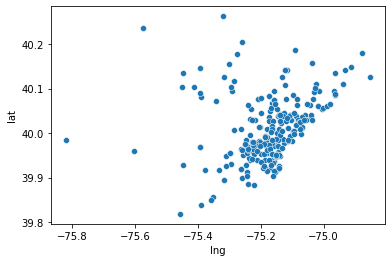

In [150]:
sns.scatterplot(data = philly, x = "lng", y = "lat")

In [151]:
philly.corr()

,lat,lng,heading,late,original_late,timestamp
lat,1.000000,0.245484,0.084910,-0.274064,-0.271534,-0.105457
lng,0.245484,1.000000,-0.020283,0.015379,0.026302,-0.190869
heading,0.084910,-0.020283,1.000000,-0.523561,-0.546517,0.049749
late,-0.274064,0.015379,-0.523561,1.000000,0.923080,-0.033851
original_late,-0.271534,0.026302,-0.546517,0.923080,1.000000,-0.037901
timestamp,-0.105457,-0.190869,0.049749,-0.033851,-0.037901,1.000000


<AxesSubplot:>

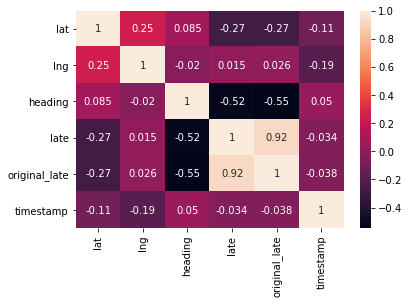

In [152]:
sns.heatmap(philly[['lat','lng','heading',"late",'original_late','timestamp']].corr(),annot = True)

# Creating Our Grid

In [153]:
newPhilly = philly[['lat','lng']]
newPhilly.head(5)

,lat,lng
Index,,
0,40.076454,-75.032730
1,40.093945,-75.016304
2,40.040787,-75.058754
3,40.062237,-75.042648
4,40.022968,-75.078667


In [154]:
print(newPhilly['lat'].max()) # range of our values
print(newPhilly['lat'].min())
print(newPhilly['lng'].max())
print(newPhilly['lng'].min())
print(newPhilly.head(5))

40.262684
39.818504
-74.852425
-75.820213
             lat        lng
Index                      
0      40.076454 -75.032730
1      40.093945 -75.016304
2      40.040787 -75.058754
3      40.062237 -75.042648
4      40.022968 -75.078667


In [155]:
import warnings # we get a warning when running the grid function. From testing, the warning seems to not produce an error 

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [156]:
def normalize(df):
    '''
    Changes the range to be in the range 0-1 to use to make a grid of points.
    '''
    for column in df.columns:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min()) #subtracts the min value then divides by the range
    return df


In [157]:
def gridSize(df): # accepts a dataframe of normalized values to become 
    '''
    Accepts a normalized dataframe and multiplies each by 25, then rounds them and converts them to integer values
    '''
    for column in df.columns:
        df[column] = df[column]*25
        df[column] = round(df[column])
    return df

In [158]:
def grid(inDf):
    '''
    This function will accept a dataframe with two columns, latitude and longitude, it will take this data, normalize it
    and then expand it onto a 25 by 25 grid. It will also drop values with non-unique lat/long pairs
    '''
    inDf = normalize(inDf)
    inDf = gridSize(inDf)
    inDf['tuples'] = list(zip(inDf.iloc[:,0], inDf.iloc[:,1])) #we will want this for checking unique coordinates
    
    inDf.drop_duplicates(subset=[inDf.columns[0], inDf.columns[1]], keep='first',inplace = True) #removes duplicate coordinates
    
    inDf['Index'] = range(len(inDf)) #fixes the index
    inDf.set_index('Index', inplace = True)
    
    return inDf

In [159]:
newPhilly = grid(newPhilly)
newPhilly.head(10)

,lat,lng,tuples
Index,,,
0,15.0,20.0,"(15.0, 20.0)"
1,16.0,21.0,"(16.0, 21.0)"
2,13.0,20.0,"(13.0, 20.0)"
3,14.0,20.0,"(14.0, 20.0)"
4,12.0,19.0,"(12.0, 19.0)"
5,20.0,24.0,"(20.0, 24.0)"
6,8.0,17.0,"(8.0, 17.0)"
7,18.0,22.0,"(18.0, 22.0)"
8,14.0,19.0,"(14.0, 19.0)"


In [160]:
newPhilly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     98 non-null     float64
 1   lng     98 non-null     float64
 2   tuples  98 non-null     object 
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [161]:
print(newPhilly['lat'].max()) # range of our new values
print(newPhilly['lat'].min())
print(newPhilly['lng'].max())
print(newPhilly['lng'].min())
print(newPhilly.head(5))

25.0
0.0
25.0
0.0
        lat   lng        tuples
Index                          
0      15.0  20.0  (15.0, 20.0)
1      16.0  21.0  (16.0, 21.0)
2      13.0  20.0  (13.0, 20.0)
3      14.0  20.0  (14.0, 20.0)
4      12.0  19.0  (12.0, 19.0)


<AxesSubplot:xlabel='lat', ylabel='lng'>

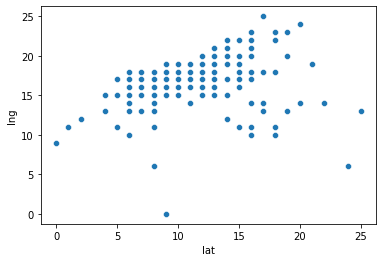

In [162]:
sns.scatterplot(data = newPhilly, x = 'lat', y = 'lng') #shows that the grid has worked correct

# Classifying Our Stops

In [163]:
def complete(inDf):
    '''
    This function recieves a list with a lat, long, and tuple of those in the range 0-1000
    The column containing the tuples is called "tuples"
    It then uses that to populate every unused coordinate and set a new column on each new entry to False
    Each old entry is set to True
    '''
    inDf['Is Station'] = True
    for i in range(25):
        for j in range(25):
            inDf = inDf.append(pd.Series([i*1.0,j*1.0,(i*1.0,j*1.0), False],index = inDf.columns),ignore_index=True )
    return inDf

In [164]:
newPhilly = complete(newPhilly)

In [165]:
newPhilly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lat         723 non-null    float64
 1   lng         723 non-null    float64
 2   tuples      723 non-null    object 
 3   Is Station  723 non-null    bool   
dtypes: bool(1), float64(2), object(1)
memory usage: 17.8+ KB


In [166]:
newPhilly.head()

,lat,lng,tuples,Is Station
0,15.0,20.0,"(15.0, 20.0)",True
1,16.0,21.0,"(16.0, 21.0)",True
2,13.0,20.0,"(13.0, 20.0)",True
3,14.0,20.0,"(14.0, 20.0)",True
4,12.0,19.0,"(12.0, 19.0)",True


In [167]:
newPhilly['Is Station'].value_counts()

False    625
True      98
Name: Is Station, dtype: int64

In [168]:
def distance(tup1,tup2):
    '''
    Accepts two tuples which the function returns the distance between
    '''
    xDis = abs(tup1[0] - tup2[0])
    yDis = abs(tup1[1] - tup2[1])
    return (xDis**2 + yDis**2)**0.5

## Finding the Average Distance for the Helsinki Data

In [169]:
# we set the quantile to 0.9 just to ensure the straggling outliers do not skew our data too hard
# we can increase this number if we want to accomidate for more data and cover more area per station
helsinkiNorm = normalize(helsinki[['distance (m)']])

# we will grab the average distance from this to use as our standard for how far a station is allowed to be from another
# any points more than this range from their closest station will immediately be ineligable for conversion
# we could also alter this to not be exactly the mean but encompass 1-2... std away from the mean; however, that complicates calculations
helsinkiMean= helsinkiNorm['distance (m)'].mean()
print(helsinkiMean)

0.5386048555855989


In [170]:
newPhilly.head()

,lat,lng,tuples,Is Station
0,15.0,20.0,"(15.0, 20.0)",True
1,16.0,21.0,"(16.0, 21.0)",True
2,13.0,20.0,"(13.0, 20.0)",True
3,14.0,20.0,"(14.0, 20.0)",True
4,12.0,19.0,"(12.0, 19.0)",True


In [171]:
def closeStation(df,dis):
    '''
    Accepts a dataframe with "tuples" and "Is Station" columns and dis(a value which the distance should not exceed)
    Creates a new column, Close Station? and sets all entries to False to begin
    If a column is within "dis" amount of an extant station, it is flagged True
    '''
    df['Close Station?'] = False
    
    i = 0 
    j = 0
    for tup in df['tuples']: #we need to check each tuple in the dataframe for if it has a station near it(within the dis)
        if(df.iloc[i]['Is Station']): #flags a station itself as already being near a station
            df.iloc[i, df.columns.get_loc('Close Station?')] = True
        else:
            for compTup in df['tuples']: #we will compare the above tuple to every single tuple pair in the dataframe          
                if (df.iloc[j]['Is Station']) and (distance(tup,compTup) < dis) == True:
                    df.iloc[i, df.columns.get_loc('Close Station?')] = True
                j = j + 1
                
        i = i +1
        j = 0
    return df

In [172]:
testFrame = closeStation(newPhilly,helsinkiMean*12.5) #Should be with the mean*25 but for testing we want to create more stations

testFrame['Close Station?'].value_counts()

True     694
False     29
Name: Close Station?, dtype: int64

In [173]:
testFrame[testFrame['Close Station?'] == True]

,lat,lng,tuples,Is Station,Close Station?
0,15.0,20.0,"(15.0, 20.0)",True,True
1,16.0,21.0,"(16.0, 21.0)",True,True
2,13.0,20.0,"(13.0, 20.0)",True,True
3,14.0,20.0,"(14.0, 20.0)",True,True
4,12.0,19.0,"(12.0, 19.0)",True,True
...,...,...,...,...,...
718,24.0,20.0,"(24.0, 20.0)",False,True
719,24.0,21.0,"(24.0, 21.0)",False,True
720,24.0,22.0,"(24.0, 22.0)",False,True
721,24.0,23.0,"(24.0, 23.0)",False,True


In [174]:
def numCovered(df,dis):
    '''
    Accepts a dataframe and checks which point has the greatest amount of uncovered points covered by it
    Converts that point to a station
    Returns the Dataframe
    '''
    j = 0
    highest = (-1.0,-1.0)
    highestCount = 0
    lastHighestCount = 0
    
    print(df[(df['Close Station?']) & (df['Is Station'] == False)].tail(5))
        
    for tups in df[(df['Close Station?']) & (df['Is Station'] == False)]['tuples']: #can only make a station within a reasonable distance to another
        for compTup in df['tuples']: #checks each tuple and compares the distance of them and if they are already covered
            if(df.iloc[j]['Close Station?'] == False) and (distance(tups,compTup) < dis):
                highestCount = highestCount + 1
            j = j + 1
        j = 0
        if highestCount > lastHighestCount:
            print(tups)
            print(highestCount)
            lastHighestCount = highestCount
            highestCount = 0
            highest = tups
         
    print("Best Pick: ")
    print(highest)
    print(lastHighestCount)
    df = df[df['tuples'] != highest]
    df = df.append(pd.Series([highest[0],highest[1],highest, True, True],index = df.columns),ignore_index=True )
    #df[df['tuples']==highest].iloc[-1, df.columns.get_loc('Is Station')] = True

    return df

# Application Demonstration

In [175]:
testFrame['Is Station'].value_counts()

False    625
True      98
Name: Is Station, dtype: int64

<AxesSubplot:xlabel='lat', ylabel='lng'>

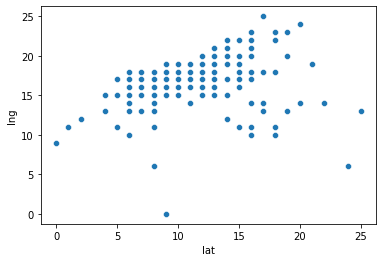

In [176]:
sns.scatterplot(data = testFrame[testFrame['Is Station']], x = 'lat', y = 'lng')

In [177]:
print('Run: ')
testFrame = numCovered(testFrame,helsinkiMean*12.5)

Run: 
      lat   lng        tuples  Is Station  Close Station?
718  24.0  20.0  (24.0, 20.0)       False            True
719  24.0  21.0  (24.0, 21.0)       False            True
720  24.0  22.0  (24.0, 22.0)       False            True
721  24.0  23.0  (24.0, 23.0)       False            True
722  24.0  24.0  (24.0, 24.0)       False            True
(0.0, 3.0)
9
(0.0, 5.0)
18
(0.0, 16.0)
19
(0.0, 20.0)
21
(1.0, 4.0)
24
(1.0, 8.0)
27
(1.0, 21.0)
28
(2.0, 5.0)
33
(2.0, 19.0)
34
(3.0, 1.0)
42
(3.0, 6.0)
45
(3.0, 23.0)
49
(4.0, 4.0)
51
(4.0, 22.0)
55
(5.0, 4.0)
57
(6.0, 0.0)
65
(6.0, 23.0)
71
(8.0, 24.0)
72
(12.0, 0.0)
81
(13.0, 1.0)
86
(14.0, 1.0)
93
(15.0, 1.0)
104
(16.0, 5.0)
110
(18.0, 4.0)
115
(19.0, 7.0)
123
(21.0, 1.0)
131
(22.0, 4.0)
143
Best Pick: 
(22.0, 4.0)
143


In [178]:
testFrame['Is Station'].value_counts()

False    624
True      99
Name: Is Station, dtype: int64

In [179]:
testFrame.tail(10)

,lat,lng,tuples,Is Station,Close Station?
713,24.0,16.0,"(24.0, 16.0)",False,True
714,24.0,17.0,"(24.0, 17.0)",False,True
715,24.0,18.0,"(24.0, 18.0)",False,True
716,24.0,19.0,"(24.0, 19.0)",False,True
717,24.0,20.0,"(24.0, 20.0)",False,True
718,24.0,21.0,"(24.0, 21.0)",False,True
719,24.0,22.0,"(24.0, 22.0)",False,True
720,24.0,23.0,"(24.0, 23.0)",False,True
721,24.0,24.0,"(24.0, 24.0)",False,True
722,22.0,4.0,"(22.0, 4.0)",True,True


<AxesSubplot:xlabel='lat', ylabel='lng'>

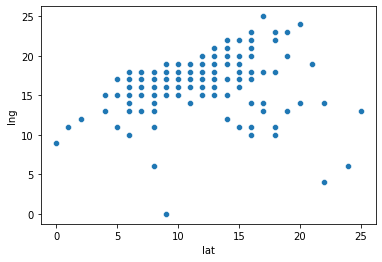

In [180]:
sns.scatterplot(data = testFrame[testFrame['Is Station']], x = 'lat', y = 'lng')

In [181]:
testFrame = closeStation(testFrame,helsinkiMean*12.5)

testFrame = numCovered(testFrame,helsinkiMean*12.5)

      lat   lng        tuples  Is Station  Close Station?
717  24.0  20.0  (24.0, 20.0)       False            True
718  24.0  21.0  (24.0, 21.0)       False            True
719  24.0  22.0  (24.0, 22.0)       False            True
720  24.0  23.0  (24.0, 23.0)       False            True
721  24.0  24.0  (24.0, 24.0)       False            True
(0.0, 3.0)
9
(0.0, 5.0)
18
(0.0, 16.0)
19
(0.0, 20.0)
21
(1.0, 4.0)
24
(1.0, 8.0)
27
(1.0, 21.0)
28
(2.0, 5.0)
33
(2.0, 19.0)
34
(3.0, 1.0)
42
(3.0, 6.0)
45
(3.0, 23.0)
49
(4.0, 4.0)
51
(4.0, 22.0)
55
(5.0, 4.0)
57
(6.0, 0.0)
65
(6.0, 23.0)
71
(8.0, 24.0)
72
(21.0, 3.0)
73
Best Pick: 
(21.0, 3.0)
73


In [182]:
testFrame['Is Station'].value_counts()

False    623
True     100
Name: Is Station, dtype: int64

<AxesSubplot:xlabel='lat', ylabel='lng'>

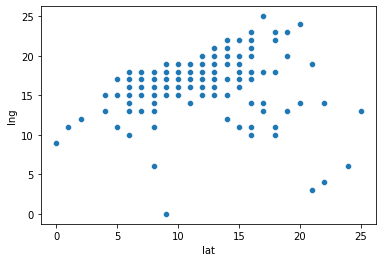

In [183]:
sns.scatterplot(data = testFrame[testFrame['Is Station']], x = 'lat', y = 'lng')

# Problems for Future Work

The model evaluates based on land, and not just land but a grid set up of land that does not account for the population densities of people

    This is solvable with the current model by adding extra parameters to the score calculation, but we lack the data of population densities and do not want to overcomplicate the current application
    
The complete function originally was meant to not reinclude positions with the same index; however, no matter what I tried, I simpily could not get the "in" keyword to register for tuple on tuple comparison


# PART II

In [184]:
newPhilly['distance'] = 100

In [185]:
newPhilly

,lat,lng,tuples,Is Station,Close Station?,distance
0,15.0,20.0,"(15.0, 20.0)",True,True,100
1,16.0,21.0,"(16.0, 21.0)",True,True,100
2,13.0,20.0,"(13.0, 20.0)",True,True,100
3,14.0,20.0,"(14.0, 20.0)",True,True,100
4,12.0,19.0,"(12.0, 19.0)",True,True,100
...,...,...,...,...,...,...
718,24.0,20.0,"(24.0, 20.0)",False,True,100
719,24.0,21.0,"(24.0, 21.0)",False,True,100
720,24.0,22.0,"(24.0, 22.0)",False,True,100
721,24.0,23.0,"(24.0, 23.0)",False,True,100


In [186]:
def calculatedistance (df):
    i = 0
    for i in range (len(df['tuples'])):
        score = 100
        if(df.iloc[i,3] == False):
            j = 0
            for j in range (len(df['tuples'])):
                if(df.iloc[j,3] == True):
                    newscore  = distance(df.iloc[i,2],df.iloc[j,2])
                    if(score > newscore):
                        score = newscore
                j = j + 1
            df.iloc[i,5] = score
    i = i + 1
    return df

In [187]:
finaldata = calculatedistance(newPhilly)

In [188]:
finaldata

,lat,lng,tuples,Is Station,Close Station?,distance
0,15.0,20.0,"(15.0, 20.0)",True,True,100.000000
1,16.0,21.0,"(16.0, 21.0)",True,True,100.000000
2,13.0,20.0,"(13.0, 20.0)",True,True,100.000000
3,14.0,20.0,"(14.0, 20.0)",True,True,100.000000
4,12.0,19.0,"(12.0, 19.0)",True,True,100.000000
...,...,...,...,...,...,...
718,24.0,20.0,"(24.0, 20.0)",False,True,3.162278
719,24.0,21.0,"(24.0, 21.0)",False,True,3.605551
720,24.0,22.0,"(24.0, 22.0)",False,True,4.242641
721,24.0,23.0,"(24.0, 23.0)",False,True,4.123106


In [189]:
data_for_vis_philly = finaldata[(finaldata['distance'] < 100)]  

<AxesSubplot:xlabel='distance', ylabel='Count'>

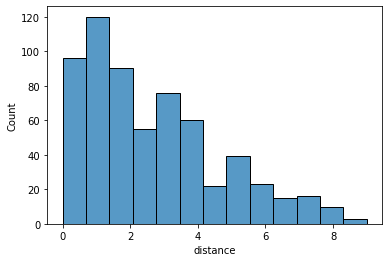

In [190]:
sns.histplot(data = data_for_vis_philly['distance'])

In [191]:
data_for_vis_philly['distance'].value_counts()

1.000000    120
0.000000     96
2.236068     55
1.414214     53
2.000000     37
3.605551     31
2.828427     29
3.162278     27
3.000000     20
5.000000     18
4.123106     16
4.000000     13
4.472136     12
5.385165     11
5.099020     10
4.242641     10
6.082763      7
7.071068      7
5.830952      7
6.000000      6
6.324555      6
6.403124      5
6.708204      4
7.211103      4
7.810250      4
7.000000      4
5.656854      3
8.062258      3
8.000000      3
8.485281      2
7.280110      1
9.000000      1
Name: distance, dtype: int64

##  Do the same for Helsinki data

In [192]:
helsinki

,departure,return,departure_id,departure_name,return_id,return_name,distance (m),duration (sec.),avg_speed (km/h),departure_latitude,departure_longitude,return_latitude,return_longitude
0,2020-03-23 06:09:44,2020-03-23 06:16:26,86,Kuusitie,111.0,Esterinportti,1747.0,401.0,0.261397,60.195245,24.901900,60.197572,24.926781
1,2020-03-23 06:11:58,2020-03-23 06:26:31,26,Kamppi (M),10.0,Kasarmitori,1447.0,869.0,0.099908,60.168609,24.930537,60.165017,24.949473
2,2020-03-23 06:16:29,2020-03-23 06:24:23,268,Porolahden koulu,254.0,Agnetankuja,1772.0,469.0,0.226695,60.195540,25.053581,60.187234,25.036412
3,2020-03-23 06:33:53,2020-03-23 07:14:03,751,Vallipolku,106.0,Korppaanmäentie,7456.0,2406.0,0.185935,60.227827,24.819614,60.203474,24.898930
4,2020-03-23 06:36:09,2020-03-23 07:04:10,62,Länsisatamankatu,121.0,Vilhonvuorenkatu,7120.0,1679.0,0.254437,60.158928,24.909692,60.186463,24.967872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157453,2017-10-30 23:43:00,2017-10-30 23:55:00,64.0,Tyynenmerenkatu,64.0,Tyynenmerenkatu,918.0,714.0,0.077143,60.156838,24.920661,60.156838,24.920661
12157454,2017-10-30 23:49:00,2017-10-31 04:49:00,117.0,Brahen puistikko,44.0,Sörnäinen (M),822.0,252.0,0.195714,60.189671,24.948102,60.187736,24.960980
12157455,2017-10-30 23:52:00,2017-10-31 00:02:00,142.0,Koskelantie,141.0,Intiankatu,1817.0,594.0,0.183535,60.208749,24.946514,60.207858,24.967638
12157456,2017-10-30 23:57:00,2017-10-31 00:00:00,28.0,Lastenlehto,26.0,Kamppi (M),416.0,152.0,0.164211,60.165812,24.927021,60.168609,24.930537


In [193]:
latlong = helsinki[["departure_latitude","departure_longitude"]]

In [194]:
latlong=latlong.rename(columns={'departure_latitude': 'lat',"departure_longitude":"lng"})

In [195]:
latlong= grid(latlong)
latlong.head(10)

,lat,lng,tuples
Index,,,
0,13.0,12.0,"(13.0, 12.0)"
1,6.0,14.0,"(6.0, 14.0)"
2,13.0,22.0,"(13.0, 22.0)"
3,22.0,6.0,"(22.0, 6.0)"
4,3.0,12.0,"(3.0, 12.0)"
5,16.0,13.0,"(16.0, 13.0)"
6,2.0,13.0,"(2.0, 13.0)"
7,4.0,13.0,"(4.0, 13.0)"
8,17.0,15.0,"(17.0, 15.0)"


In [196]:
print(latlong['lat'].max()) # range of our new values
print(latlong['lat'].min())
print(latlong['lng'].max())
print(latlong['lng'].min())
print(latlong.head(5))

25.0
0.0
25.0
0.0
        lat   lng        tuples
Index                          
0      13.0  12.0  (13.0, 12.0)
1       6.0  14.0   (6.0, 14.0)
2      13.0  22.0  (13.0, 22.0)
3      22.0   6.0   (22.0, 6.0)
4       3.0  12.0   (3.0, 12.0)


In [197]:
latlong = complete(latlong)

In [198]:
latlong

,lat,lng,tuples,Is Station
0,13.0,12.0,"(13.0, 12.0)",True
1,6.0,14.0,"(6.0, 14.0)",True
2,13.0,22.0,"(13.0, 22.0)",True
3,22.0,6.0,"(22.0, 6.0)",True
4,3.0,12.0,"(3.0, 12.0)",True
...,...,...,...,...
857,24.0,20.0,"(24.0, 20.0)",False
858,24.0,21.0,"(24.0, 21.0)",False
859,24.0,22.0,"(24.0, 22.0)",False
860,24.0,23.0,"(24.0, 23.0)",False


In [203]:
latlong['distance'] = 100

In [204]:
latlong

,lat,lng,tuples,Is Station,distance
0,13.0,12.0,"(13.0, 12.0)",True,100
1,6.0,14.0,"(6.0, 14.0)",True,100
2,13.0,22.0,"(13.0, 22.0)",True,100
3,22.0,6.0,"(22.0, 6.0)",True,100
4,3.0,12.0,"(3.0, 12.0)",True,100
...,...,...,...,...,...
857,24.0,20.0,"(24.0, 20.0)",False,100
858,24.0,21.0,"(24.0, 21.0)",False,100
859,24.0,22.0,"(24.0, 22.0)",False,100
860,24.0,23.0,"(24.0, 23.0)",False,100


In [207]:
def calculatedistance (df):
    i = 0
    for i in range (len(df['tuples'])):
        score = 100
        if(df.iloc[i,3] == False):
            j = 0
            for j in range (len(df['tuples'])):
                if(df.iloc[j,3] == True):
                    newscore  = distance(df.iloc[i,2],df.iloc[j,2])
                    if(score > newscore):
                        score = newscore
                j = j + 1
            df.iloc[i,4] = score
    i = i + 1
    return df

In [208]:
latlong = calculatedistance(latlong)

In [210]:
hel_data_for_vis = latlong[(latlong['distance'] < 100)]

## histplots of Philly and Helsinki

<AxesSubplot:xlabel='distance', ylabel='Count'>

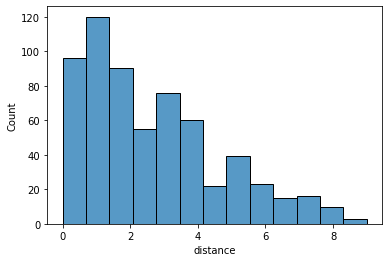

In [211]:
sns.histplot(data = data_for_vis_philly['distance'])  #this is data of Philly

<AxesSubplot:xlabel='distance', ylabel='Count'>

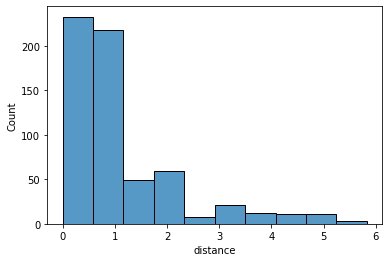

In [212]:
sns.histplot(data = hel_data_for_vis['distance'],bins =10) # This is data for Helsinki

# Indego Bikes Dataset

## We will use this bike sharing data as a comparison for our bike sharing effectivity
### data comes from here https://www.rideindego.com/about/data/

In [213]:
Q1 = "indego-trips-2021-q1.csv"
Q2 = "indego-trips-2021-q2.csv"
Q3 = "indego-trips-2021-q3.csv"
Q4 = "indego-trips-2021-q4.csv"

In [214]:
Q1_2021 = pd.read_csv(Q1, low_memory=False)
Q2_2021 = pd.read_csv(Q2,low_memory=False)
Q3_2021 = pd.read_csv(Q3,low_memory=False)
Q4_2021 = pd.read_csv(Q4,low_memory=False)

In [215]:
Bikes = pd.concat([Q1_2021,Q2_2021,Q3_2021,Q4_2021])

In [216]:
newbikes =Bikes[['duration',"plan_duration",'trip_route_category','bike_type']]sns.boxplot(x=newbikes['duration']) sns.boxplot(x=newbikes['duration']) 

In [217]:
newbikes = newbikes.sample(n = 500, random_state = 101)

In [218]:
newbikes.isnull().sum()

duration               0
plan_duration          0
trip_route_category    0
bike_type              0
dtype: int64

In [219]:
newbikes['duration'].value_counts().max()

37

<AxesSubplot:xlabel='duration', ylabel='Count'>

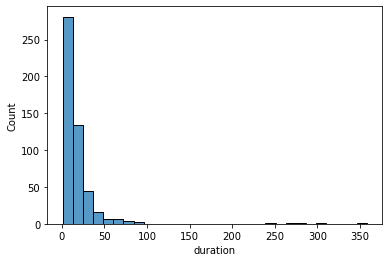

In [221]:
sns.histplot(data = newbikes,x=newbikes['duration'],bins = 30)

<AxesSubplot:xlabel='duration'>

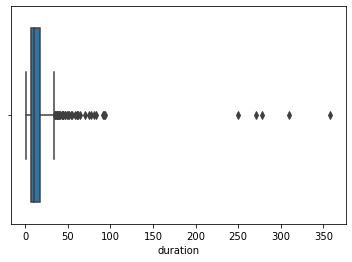

In [222]:
sns.boxplot(x=newbikes['duration']) 

In [223]:
helsinki['duration (sec.)'].mean()

960.0554290073143

In [224]:
helsinki_duration_min = 960/60  #average duration time in helsinki

In [225]:
def binariesconverter (time):
    if time < 16:
        return 0
    else:
        return 1

In [226]:
newbikes["category"] = newbikes['duration'].apply(binariesconverter)

<AxesSubplot:xlabel='category', ylabel='count'>

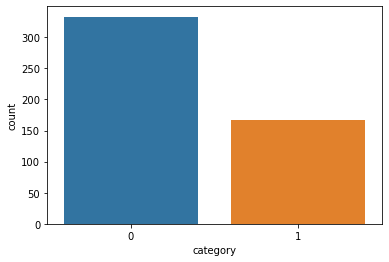

In [227]:
sns.countplot(x = newbikes['category'])  

## convert strings into number

In [228]:
newbikes['trip_route_category'].unique()

array(['One Way', 'Round Trip'], dtype=object)

In [229]:
def routeconverter (route):
    if route == "One Way":
        return 0
    else:
        return 1

In [230]:
newbikes["trip_route_category"] = newbikes['trip_route_category'].apply(routeconverter)

In [231]:
newbikes ["bike_type"].unique()

array(['standard', 'electric'], dtype=object)

In [232]:
def typeconverter (type):
    if type == "standard":
        return 0
    else:
        return 1

In [233]:
newbikes["bike_type"] = newbikes['bike_type'].apply(typeconverter)

In [234]:
newbikes['category'].value_counts()

0    333
1    167
Name: category, dtype: int64

## StandardScaler

In [235]:
from sklearn.preprocessing import StandardScaler

In [236]:
ss = StandardScaler()

In [237]:
X = newbikes.drop(['duration','category'],axis = 1)

In [238]:
y = newbikes['category']

In [239]:
X_scaled = ss.fit_transform(X)

In [240]:
from sklearn.model_selection import train_test_split

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

## Model1 LinearSVC

In [242]:
from sklearn.svm import LinearSVC

In [243]:
model = LinearSVC()


model.fit(X_train,y_train)

LinearSVC()

In [244]:
predictions = model.predict(X_test)

In [245]:
from sklearn.metrics import (classification_report,
                                                    f1_score,
                                                 accuracy_score)

In [246]:
print('Classification Report: \n',    classification_report(y_test,predictions)   ) 

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        98
           1       0.00      0.00      0.00        52

    accuracy                           0.65       150
   macro avg       0.33      0.50      0.40       150
weighted avg       0.43      0.65      0.52       150



/Users/yusuke.s/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [247]:
print('Accuracy Score: ',       accuracy_score(y_test,predictions)  )

Accuracy Score:  0.6533333333333333


## Model2 KNN

In [248]:
from sklearn.neighbors import KNeighborsClassifier

In [249]:
model2 = KNeighborsClassifier( n_neighbors=2)

In [255]:
model2.fit(X_test,y_test)

KNeighborsClassifier(n_neighbors=2)

In [256]:
prediction = model2.predict(X_test)

In [257]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.70      0.98      0.82        98
           1       0.85      0.21      0.34        52

    accuracy                           0.71       150
   macro avg       0.77      0.60      0.58       150
weighted avg       0.75      0.71      0.65       150



## model3 SVM

In [258]:
from sklearn.svm import SVC

In [259]:
model = SVC(kernel = 'linear',random_state = 101)
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=101)

In [260]:
predictions = model.predict(X_test)

In [261]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [262]:
print( confusion_matrix(y_test,predictions) )
print('\n')
print( classification_report(y_test,predictions)  )

[[98  0]
 [52  0]]


              precision    recall  f1-score   support

           0       0.65      1.00      0.79        98
           1       0.00      0.00      0.00        52

    accuracy                           0.65       150
   macro avg       0.33      0.50      0.40       150
weighted avg       0.43      0.65      0.52       150



/Users/yusuke.s/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [263]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf',"linear"]} 

In [264]:
from sklearn.model_selection import GridSearchCV

In [265]:
grid = GridSearchCV(estimator = SVC(random_state = 101),
                            param_grid = param_grid,
                             refit =  True,  #これでtrainしたあとどれが一番いいか見つける
                            verbose = 3)

In [266]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.671, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.671, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.671, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.671, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.671, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.671, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.671, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.586, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.671, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.671, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.671, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.671, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.671, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.671, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] ..... C=100, gamma=0.1, kernel=linear, score=0.671, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.643, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.586, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.657, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.671, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.643, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .

[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.586, total=   4.6s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.671, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.671, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV] ... C=1000, gamma=0.01, kernel=linear, score=0.671, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.671, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.586, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.671, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   24.1s finished


GridSearchCV(estimator=SVC(random_state=101),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [267]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [268]:
grid_predictions = grid.predict(X_test)

In [269]:
print(confusion_matrix(y_test,grid_predictions)   )
print( classification_report(y_test,grid_predictions)  )

[[98  0]
 [47  5]]
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        98
           1       1.00      0.10      0.18        52

    accuracy                           0.69       150
   macro avg       0.84      0.55      0.49       150
weighted avg       0.79      0.69      0.59       150

